In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [7]:
# import dataset 

covid_dataset = pd.read_csv(r'C:\Users\tony3\Desktop\covid19_Confirmed_dataset.csv')
covid_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
# check the shape of dataframe

covid_dataset.shape

(266, 104)

In [14]:
# drop the useless columns 
covid_dataset.drop(['Province/State', 'Lat','Long'],axis=1, inplace=True)
covid_dataset.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [17]:
# aggreating the rows by country 
covid_dataset_aggregated = covid_dataset.groupby('Country/Region').sum()
# to check the shape of aggregated dataset
covid_dataset_aggregated.shape

(187, 100)

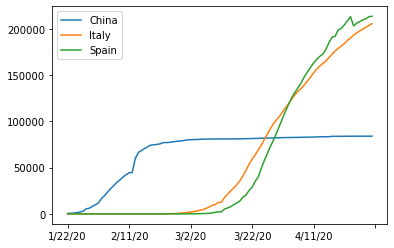

In [21]:
# visualizing data related to a country 
covid_dataset_aggregated.loc['China'].plot()
covid_dataset_aggregated.loc['Italy'].plot()
covid_dataset_aggregated.loc['Spain'].plot()
plt.legend()

<AxesSubplot:>

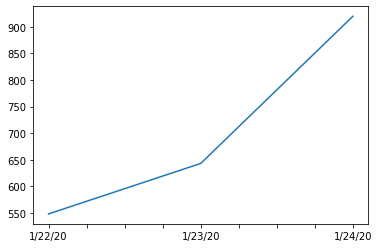

In [22]:
# find the infected number in the first three days
covid_dataset_aggregated.loc['China'][:3].plot()

<AxesSubplot:>

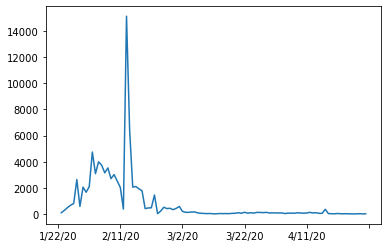

In [24]:
# calculate the PDFs from CDFs
covid_dataset_aggregated.loc['China'].diff().plot()

In [25]:
# find the maximum infection rate for China, Italy, Spain
covid_dataset_aggregated.loc['China'].diff().max()

15136.0

In [26]:
covid_dataset_aggregated.loc['Italy'].diff().max()

6557.0

In [27]:
covid_dataset_aggregated.loc['Spain'].diff().max()

9630.0

In [28]:
# find maximum infection rate for all countries 
countries = list(covid_dataset_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(covid_dataset_aggregated.loc[c].diff().max())
covid_dataset_aggregated['max_infection_rate'] = max_infection_rates

In [29]:
covid_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [31]:
# create new dataframe 
covid_data = pd.DataFrame(covid_dataset_aggregated['max_infection_rate'])
covid_data

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [33]:
# import dataset of the world happiness report 
happiness_report_csv = pd.read_csv(r'C:\Users\tony3\Desktop\worldwide_happiness_report.csv')
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [34]:
# check the shape of the dataset
happiness_report_csv.shape

(156, 9)

In [35]:
# drop the useless columns 
useless = ['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']
happiness_report_csv.drop(useless, axis=1, inplace=True)

In [36]:
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [37]:
# change the indices of the dataframe
happiness_report_csv.set_index('Country or region', inplace=True)

In [39]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [44]:
# join two datasets covid_data and happiness_report_csv

df = covid_data.join(happiness_report_csv, how='inner')


In [45]:
# find the correlation matrix

df.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


C:\Users\tony3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

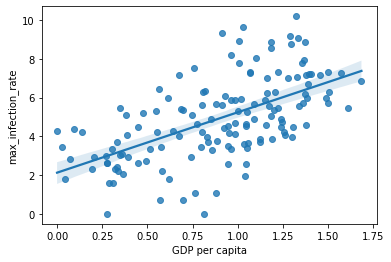

In [49]:
# visualize the findings from correlation matrix
x = df['GDP per capita']
y = df['max_infection_rate']
sns.regplot(x,np.log(y))




C:\Users\tony3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='max_infection_rate'>

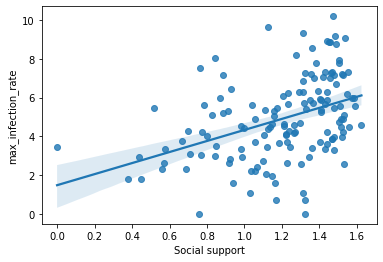

In [50]:
x = df['Social support']
y = df['max_infection_rate']
sns.regplot(x,np.log(y))

C:\Users\tony3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

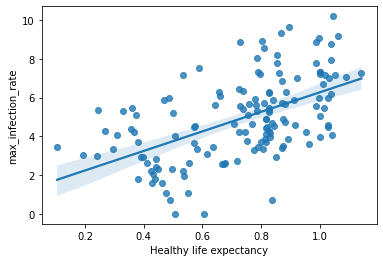

In [51]:
x = df['Healthy life expectancy']
y = df['max_infection_rate']
sns.regplot(x,np.log(y))

C:\Users\tony3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

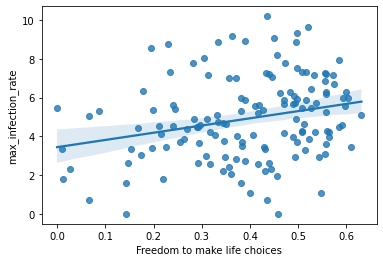

In [52]:
x = df['Freedom to make life choices']
y = df['max_infection_rate']
sns.regplot(x,np.log(y))